# Imports

In [246]:

# coding: utf-8

# # Imports

# ## Qutip imports 1

# In[1]:


from qutip.operators import sigmax, sigmay, sigmaz, identity
# position, momentum, num, create, destroy, commutator, qeye 
from qutip.tensor import tensor
from qutip.qip.gates import swap, rx, ry, rz
from qutip.qobj import Qobj
from qutip.visualization import hinton
from qutip.visualization import matrix_histogram_complex, matrix_histogram
from qutip.random_objects import rand_herm, rand_unitary, rand_dm


# ## Qutip imports 2

# In[2]:


#from 


# ## Numpy imports 

# In[2]:


from numpy import sin, cos, tan, real, imag,  log, conj
from numpy import array, append, linspace, arange
from numpy import add, sqrt, abs, dot
from numpy.random import random, random_sample, rand, seed, RandomState
from numpy import concatenate, trace, diag
from numpy import ones, zeros, ones_like, zeros_like
from numpy import amax, amin, nanmax, nanmin
from numpy import outer, multiply
# from numpy import pi


# ## Scipy imports

# In[17]:


from scipy.integrate import ode, odeint, complex_ode
from scipy.optimize import minimize
from scipy.linalg import eigh, inv, norm, expm
# from scipy.linalg import 
# from scipy import


# ## Matplotlib imports

# In[18]:


from matplotlib.pyplot import plot, figure, show, savefig, axes
from matplotlib.pyplot import xlabel, ylabel, title, legend
from matplotlib import rcParams
from matplotlib.pyplot import style 
from matplotlib.pyplot import xlim, ylim, axis 
# beware not same as axes
from matplotlib.pyplot import subplot, subplots, text
from matplotlib.pyplot import GridSpec
from matplotlib.pyplot import scatter, colorbar


pgf_with_rc_fonts = {"pgf.texsystem": "pdflatex"}
rcParams.update(pgf_with_rc_fonts)
style.use('seaborn-whitegrid')


# ## Math imports

# In[19]:


from math import pi
from math import exp


# ## Cmath imports

# ## Date and datetime imports

# In[20]:


from datetime import date
from datetime import datetime# now


# ## Os imports

# In[21]:


from os import getcwd, mkdir, chdir
from os.path import abspath, join 


# ## Sympy imports

# In[22]:


from sympy import Function, dsolve, Eq, Derivative, symbols
# x, y, z, t = symbols('x y z t')
# k, m, n = symbols('k m n', integer=True)
# f, g, h = symbols('f g h', cls=Function)


# ## Miscellaneous imports

# ## Extra useful functions

# In[23]:


def rint(x):
    print("x = ", x)
    return None


# # Next chapter

# ## sub topic 1

# ## sub topic 2

# ## sub topic 3

# ### sub sub topic 1



# The code 

## memory wiping

In [247]:
%reset_selective -f  omega_1, total_time, epsilon, max_iter, time_steps, dt

In [248]:
%reset_selective -f  Lin, T_s, I

## Building parts

### Building the things to be calculated only once

In [249]:
def maker(H_0, H_1, T_s, Lin, d=2, gamma=0.1):
    r"""maker
    Makes all the things that remain constant throught the program, but are 
    repeatedly used.
    

    Parameters
    ----------
              
    H_0     : Qobj
              Bare Hamiltonian 
              
    H_1     : Qobj
              Interaction Hamiltonian 
              
    T_s     : Qobj
              Unitary to be implemented in the Hilbert space
    
    Lin     : Qobj
              Linbladian operators

    d       : int
              Dimension of the matrix. Defaults to 2
    
    gamma   : float
              Damping constant of the Linbladian

    
    Returns
    -------
    
    ih0     : Qobj
              $I\otimes H_{0}$
              
    ih1     : Qobj
              $I\otimes H_{1}$

    h0ci    : Qobj
              $H_{0}^{*}\otimes I $

    h1ci    : Qobj
              $H_{1}^{*}\otimes I $

    T       : Qobj
              Target unitary transformed to the Liouville space

    linbladian : Qobj
                 The full lindbladian term as it appears on transformation to 
                 the Liouville space.
        
    """
    I = identity(d)
    L_I = tensor(I, I)
    ih0 = tensor(I, H_0) 
    ih1 = tensor(I, H_1) 
    h0ci = tensor(H_0.conj(), I) 
    h1ci = tensor(H_1.conj(), I)
    x_k = ih1 - h1ci
    term1 = tensor(Lin.trans(), Lin)
    term2 = tensor(I, ((Lin.dag())*(Lin)))
    term3 = tensor(((Lin.trans())*(Lin.conj())), I)
    lindbladian = 1j*(gamma)*(term1 - 0.5*(term2 + term3))
    T = tensor(T_s.trans(), T_s) # Transforming $T_{s}$ to liouville space
    
    
    return ih0, ih1, h0ci, h1ci, x_k, lindbladian, T, L_I

In [250]:
omega_1 = 0.5
H_0 = omega_1*sigmaz() 
H_1 = sigmay()
T_s = sigmax() 
Lin = sigmaz()
ih0, ih1, h0ci, h1ci, x_k, lindbladian, T, L_I  = maker(
                                                  H_0, H_1, T_s, 
                                                  Lin, d=2, gamma=0.1)

In [251]:
L_I

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

### Building $And(t)$

In [252]:
def And(xi):
    r"""making $And(t)$"""
    And = ih0 - h0ci + xi*(ih1 - h1ci) #+ lindbladian
    return And

In [253]:
And(0.5)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.+0.j   0.-0.5j  0.-0.5j  0.+0.j ]
 [ 0.+0.5j -1.+0.j   0.+0.j   0.-0.5j]
 [ 0.+0.5j  0.+0.j   1.+0.j   0.-0.5j]
 [ 0.+0.j   0.+0.5j  0.+0.5j  0.+0.j ]]

### Building $Lnd(t)$ 

In [254]:
def Lnd(xi, dt):
    r"""Making $Lnd(t) from $A(t)$"""
    Lnd = (-1j*And(xi)*dt).expm()
    return Lnd

In [255]:
Lnd(0.5, 0.001)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 9.99999750e-01+0.00000000e+00j -4.99999833e-04-2.49999958e-07j
  -4.99999833e-04+2.49999958e-07j  2.49999958e-07+0.00000000e+00j]
 [ 4.99999833e-04+2.49999958e-07j  9.99999250e-01+9.99999667e-04j
  -2.49999958e-07+0.00000000e+00j -4.99999833e-04-2.49999958e-07j]
 [ 4.99999833e-04-2.49999958e-07j -2.49999958e-07+0.00000000e+00j
   9.99999250e-01-9.99999667e-04j -4.99999833e-04+2.49999958e-07j]
 [ 2.49999958e-07+0.00000000e+00j  4.99999833e-04+2.49999958e-07j
   4.99999833e-04-2.49999958e-07j  9.99999750e-01+0.00000000e+00j]]

## Major functions

### Major functions 1

In [256]:
# building the function to optimize (optimizee)
def Lnd_vec(xi_vec, dt):
    r"""Building the vector of differential $Lnd(t)$"""
    Lnd_vec = [Lnd(xi, dt) for xi in xi_vec] 
    return Lnd_vec

In [257]:
def fidelity_calc(A, B):
    r"""Making a generalised fidelity function"""
    first_part = (A - B).dag()
    second_part = (A - B)
    f_int = (first_part* second_part)
    f = f_int.tr()
    return f

In [258]:
def Lnd_full_maker(xi_vec, dt):
    r"""Building the $Lnd(t)$ for the total time $t$"""
    xi_vec_size = xi_vec.size # finding the size of xi
    Lnd_full = L_I # Identity for the for loop of Lnd
    Lnd_v = Lnd_vec(xi_vec, dt) # calling Lnd_vec
    for i in range(xi_vec_size): # generating Lnd_full
        Lnd_full = Lnd_full*Lnd_v[xi_vec_size - 1 - i]
    return Lnd_full

In [259]:
def F(xi_vec, dt):
    r"""Using the fidelity metric to find out the closeness between $T$
    and $Lnd(t)$"""
    Lnd_full = Lnd_full_maker(xi_vec, dt)
    F = real(-fidelity_calc(T, Lnd_full))   
    return F

### Testing major functions 1

In [260]:
fidelity_calc(sigmax(), sigmay())

4.0

In [261]:
fidelity_calc(sigmay(), sigmay())

0.0

In [262]:
xi_vec_test = array([1.0, 2.0])
xi_vec_test

array([1., 2.])

In [263]:
xi_vec_test.size

2

In [264]:
w_vec = [xi**2 for xi in xi_vec_test]
w_vec

[1.0, 4.0]

In [265]:
# F(xi_vec, dt)
F(xi_vec_test, 0.001)

-7.999999999998001

In [266]:
Lnd_v = Lnd_vec(xi_vec_test, 0.001)

In [267]:
Lnd_v

[Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
 Qobj data =
 [[ 9.99999000e-01+0.00000000e+00j -9.99999167e-04-4.99999792e-07j
   -9.99999167e-04+4.99999792e-07j  9.99999583e-07+0.00000000e+00j]
  [ 9.99999167e-04+4.99999792e-07j  9.99998500e-01+9.99999167e-04j
   -9.99999583e-07+0.00000000e+00j -9.99999167e-04-4.99999792e-07j]
  [ 9.99999167e-04-4.99999792e-07j -9.99999583e-07+0.00000000e+00j
    9.99998500e-01-9.99999167e-04j -9.99999167e-04+4.99999792e-07j]
  [ 9.99999583e-07+0.00000000e+00j  9.99999167e-04+4.99999792e-07j
    9.99999167e-04-4.99999792e-07j  9.99999000e-01+0.00000000e+00j]],
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
 Qobj data =
 [[ 9.99996000e-01+0.00000000e+00j -1.99999433e-03-9.99998583e-07j
   -1.99999433e-03+9.99998583e-07j  3.99999433e-06+0.00000000e+00j]
  [ 1.99999433e-03+9.99998583e-07j  9.99995500e-01+9.99997167e-04j
   -3.99999433e-06+0.00000000e+00j -1.99999433e-03-9.99998

### Major Functions 2

In [268]:
def Lnd_comma_k_maker(xi_vec, k, dt):
    r"""Making of the derivative of full $Lnd(t)$ at time $t_{k}$"""
    N = xi_vec.size 
    # Determining the size of xi, and thus the time_steps indirectly.
    Lnd_v = Lnd_vec(xi_vec, dt)# Making of the full $Lnd(t)$
    inner_part = L_I # Beginner for the for loop
    for i in range(N):
        if i == ( N - 1 - k ):
            # The step at which $X_{k}(t)$ has to be inserted 
            inner_part = inner_part*x_k*Lnd_v[k - 1]
        else:
            # Usual multiplications of $Lnd_{k}$
            inner_part = inner_part*Lnd_v[N - 1 - i]
    lnd_comma_k = inner_part
    return lnd_comma_k
    

In [269]:
# Lnd_comma_k_maker(xi_vec, k, dt)
Lnd_comma_k_maker(xi_vec_test, 2, 0.001)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 9.99991000e-01+0.00000000e+00j -2.99997950e-03-3.49998654e-06j
  -2.99997950e-03+3.49998654e-06j  8.99997025e-06+0.00000000e+00j]
 [ 2.99998050e-03+2.49999246e-06j  9.99989000e-01+1.99998633e-03j
  -8.99996975e-06+2.99999225e-09j -2.99998050e-03-2.49999246e-06j]
 [ 2.99998050e-03-2.49999246e-06j -8.99996975e-06-2.99999225e-09j
   9.99989000e-01-1.99998633e-03j -2.99998050e-03+2.49999246e-06j]
 [ 8.99997025e-06+0.00000000e+00j  2.99997950e-03+3.49998654e-06j
   2.99997950e-03-3.49998654e-06j  9.99991000e-01+0.00000000e+00j]]

In [270]:
def updater_nd(xi_vec, dt, epsilon):
    r"""Implementing the GRAPE update step"""
    xi_vec_size = xi_vec.size # finding the size of xi
    Lnd_full = Lnd_full_maker(xi_vec, dt)
    di = []
    for k in range(xi_vec_size):
        # Building the thing to be added to the old function
        Lnd_comma_k = Lnd_comma_k_maker(xi_vec, k, dt)
        differentiated = T - Lnd_comma_k
        plain = T - Lnd_full
        c = -differentiated.dag()*plain
        d = -plain.dag()*differentiated
        inside = c.tr() + d.tr()
        di.append(epsilon*inside)

    diff = array(di)
    xi_new_vec = xi_vec + diff
    return diff, xi_new_vec
    

In [271]:
#  updater_nd(xi_vec, dt, epsilon)
updater_nd(xi_vec_test, 0.001, 0.001)

(array([-0.008+0.j, -0.008+0.j]), array([0.992+0.j, 1.992+0.j]))

In [272]:
def terminator_nd(max_iter, time_steps, total_time, epsilon):
    r"""Brief description of the function"""
    
    xi_initial =  1000*random_sample((time_steps,))
    dt = total_time/time_steps
    xi_diff, xi_new_vec = updater_nd(xi_initial, dt, epsilon)
    
    for i in range(max_iter):
        if amax(xi_diff) < epsilon**2 :
            xi_final = xi_new_vec
            break
        else :
            xi_diff, xi_new_vec = updater_nd(xi_new_vec, dt, epsilon)
            print(i)
            print(amax(xi_diff))
            
        
    xi_final = xi_new_vec    
    return xi_final

# code with dissipation

## Building parts

### Building $A(t)$

In [273]:
def A(xi):
    r"""making $A(t)$"""
    A = ih0 - h0ci + xi*(ih1 - h1ci) + lindbladian
    return A

In [274]:
A(0.5)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.+0.j   0.-0.5j  0.-0.5j  0.+0.j ]
 [ 0.+0.5j -1.-0.2j  0.+0.j   0.-0.5j]
 [ 0.+0.5j  0.+0.j   1.-0.2j  0.-0.5j]
 [ 0.+0.j   0.+0.5j  0.+0.5j  0.+0.j ]]

### Building $L(t)$ and the Identity in the Liouville space

In [275]:
def L(xi, dt):
    r"""Making $L(t) from $A(t)$"""
    L = (-1j*A(xi)*dt).expm()
    return L

In [276]:
L(0.5, 0.001)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 9.99999750e-01+0.00000000e+00j -4.99949837e-04-2.49966628e-07j
  -4.99949837e-04+2.49966628e-07j  2.49983293e-07+0.00000000e+00j]
 [ 4.99949837e-04+2.49966628e-07j  9.99799270e-01+9.99799687e-04j
  -2.49966628e-07+0.00000000e+00j -4.99949837e-04-2.49966628e-07j]
 [ 4.99949837e-04-2.49966628e-07j -2.49966628e-07+0.00000000e+00j
   9.99799270e-01-9.99799687e-04j -4.99949837e-04+2.49966628e-07j]
 [ 2.49983293e-07+0.00000000e+00j  4.99949837e-04+2.49966628e-07j
   4.99949837e-04-2.49966628e-07j  9.99999750e-01+0.00000000e+00j]]

## Major functions

### Major functions 1

In [277]:
# building the function to optimize (optimizee)
def L_vec(xi_vec, dt):
    r"""Building the vector of differential $L(t)$"""
    L_vec = [L(xi, dt) for xi in xi_vec] 
    return L_vec

In [278]:
def fidelity_calc(A, B):
    r"""Making a generalised fidelity function"""
    first_part = (A - B).dag()
    second_part = (A - B)
    f_int = (first_part* second_part)
    f = f_int.tr()
    return f

In [279]:
def L_full_maker(xi_vec, dt):
    r"""Building the $L(t)$ for the total time $t$"""
    xi_vec_size = xi_vec.size # finding the size of xi
    L_full = L_I # Identity for the for loop of L
    L_v = L_vec(xi_vec, dt) # calling L_vec
    for i in range(xi_vec_size): # generating L_full
        L_full = L_full*L_v[xi_vec_size - 1 - i]
    return L_full

In [280]:
def F(xi_vec, dt):
    r"""Using the fidelity metric to find out the closeness between $T$
    and $L(t)$"""
    L_full = L_full_maker(xi_vec, dt)
    F = real(-fidelity_calc(T, L_full))   
    return F

### Testing major functions 1

In [281]:
fidelity_calc(sigmax(), sigmay())

4.0

In [282]:
fidelity_calc(sigmay(), sigmay())

0.0

In [283]:
xi_vec_test = array([1.0, 2.0])
xi_vec_test

array([1., 2.])

In [284]:
xi_vec_test.size

2

In [285]:
w_vec = [xi**2 for xi in xi_vec_test]
w_vec

[1.0, 4.0]

In [286]:
# F(xi_vec, dt)
F(xi_vec_test, 0.001)

-7.998400634493139

In [287]:
L_v = L_vec(xi_vec_test, 0.001)

In [288]:
L_v

[Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
 Qobj data =
 [[ 9.99999000e-01+0.00000000e+00j -9.99899173e-04-4.99933130e-07j
   -9.99899173e-04+4.99933130e-07j  9.99932920e-07+0.00000000e+00j]
  [ 9.99899173e-04+4.99933130e-07j  9.99798520e-01+9.99799187e-04j
   -9.99866260e-07+0.00000000e+00j -9.99899173e-04-4.99933130e-07j]
  [ 9.99899173e-04-4.99933130e-07j -9.99866260e-07+0.00000000e+00j
    9.99798520e-01-9.99799187e-04j -9.99899173e-04+4.99933130e-07j]
  [ 9.99932920e-07+0.00000000e+00j  9.99899173e-04+4.99933130e-07j
    9.99899173e-04-4.99933130e-07j  9.99999000e-01+0.00000000e+00j]],
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
 Qobj data =
 [[ 9.99996000e-01+0.00000000e+00j -1.99979435e-03-9.99865260e-07j
   -1.99979435e-03+9.99865260e-07j  3.99972768e-06+0.00000000e+00j]
  [ 1.99979435e-03+9.99865260e-07j  9.99795521e-01+9.99797187e-04j
   -3.99946104e-06+0.00000000e+00j -1.99979435e-03-9.99865

### Major Functions 2

In [289]:
def L_comma_k_maker(xi_vec, k, dt):
    r"""Making of the derivative of full $L(t)$ at time $t_{k}$"""
    N = xi_vec.size 
    # Determining the size of xi, and thus the time_steps indirectly.
    L_v = L_vec(xi_vec, dt)# Making of the full $L(t)$
    inner_part = L_I # Beginner for the for loop
    for i in range(N):
        if i == ( N - 1 - k ):
            # The step at which $X_{k}(t)$ has to be inserted 
            inner_part = inner_part*x_k*L_v[k - 1]
        else:
            # Usual multiplications of $L_{k}$
            inner_part = inner_part*L_v[N - 1 - i]
    l_comma_k = inner_part
    return l_comma_k
    

In [290]:
# L_comma_k_maker(xi_vec, k, dt)
L_comma_k_maker(xi_vec_test, 2, 0.001)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 9.99991001e-01+0.00000000e+00j -2.99927960e-03-3.49898670e-06j
  -2.99927960e-03+3.49898670e-06j  8.99883703e-06+0.00000000e+00j]
 [ 2.99948056e-03+2.49939255e-06j  9.99589083e-01+1.99918650e-03j
  -8.99750347e-06+2.99899242e-09j -2.99948056e-03-2.49939255e-06j]
 [ 2.99948056e-03-2.49939255e-06j -8.99750347e-06-2.99899242e-09j
   9.99589083e-01-1.99918650e-03j -2.99948056e-03+2.49939255e-06j]
 [ 8.99883703e-06+0.00000000e+00j  2.99927960e-03+3.49898670e-06j
   2.99927960e-03-3.49898670e-06j  9.99991001e-01+0.00000000e+00j]]

In [291]:
def updater(xi_vec, dt, epsilon):
    r"""Implementing the GRAPE update step"""
    xi_vec_size = xi_vec.size # finding the size of xi
    L_full = L_full_maker(xi_vec, dt)
    di = []
    for k in range(xi_vec_size):
        # Building the thing to be added to the old function
        L_comma_k = L_comma_k_maker(xi_vec, k, dt)
        differentiated = T - L_comma_k
        plain = T - L_full
        c = -differentiated.dag()*plain
        d = -plain.dag()*differentiated
        inside = c.tr() + d.tr()
        di.append(epsilon*inside)

    diff = array(di)
    xi_new_vec = xi_vec + diff
    return diff, xi_new_vec
    

In [292]:
#  updater(xi_vec, dt, epsilon)
updater(xi_vec_test, 0.001, 0.001)

(array([-0.008+0.j, -0.008+0.j]), array([0.992+0.j, 1.992+0.j]))

In [293]:
def terminator(max_iter, time_steps, total_time, epsilon):
    r"""Brief description of the function"""
    
    xi_initial = terminator_nd(max_iter, time_steps, total_time, epsilon)
    #1000*random_sample((time_steps,))
    dt = total_time/time_steps
    xi_diff, xi_new_vec = updater(xi_initial, dt, epsilon)
    
    for i in range(max_iter):
        if amax(xi_diff) < epsilon**2 :
            xi_final = xi_new_vec
            break
        else :
            xi_diff, xi_new_vec = updater(xi_new_vec, dt, epsilon)
            print(i)
            print(amax(xi_diff))
            
        
    xi_final = xi_new_vec    
    return xi_final

# Running stuff

### Try1

In [294]:
total_time = pi/omega_1
epsilon = 10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [295]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([487.11444908+0.j, 838.11042998+0.j, 306.09558376+0.j,
        92.76425756+0.j, 402.86813558+0.j, 213.84928642+0.j,
       357.56364339+0.j, 756.9086327 +0.j, 475.38384543+0.j,
       697.44257893+0.j, 741.29020318+0.j, 934.62511264+0.j,
       954.54153909+0.j, 834.88773707+0.j, 977.63024697+0.j,
       239.45095167+0.j, 478.1472171 +0.j, 306.11870299+0.j,
       745.35809871+0.j, 444.30144677+0.j])

In [296]:
F(xi_opt, dt)

-4.220315297422168

In [297]:
max_iter

10

In [298]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [299]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.24866774+0.j         -0.08910616-0.00138601j -0.08910616+0.00138601j
   0.75133226+0.j        ]
 [ 0.08895835+0.00134218j -0.10925458+0.00058462j -0.39385614-0.00027019j
  -0.08895835-0.00134218j]
 [ 0.08895835-0.00134218j -0.39385614+0.00027019j -0.10925458-0.00058462j
  -0.08895835+0.00134218j]
 [ 0.75133226+0.j          0.08910616+0.00138601j  0.08910616-0.00138601j
   0.24866774+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a17034f60>)

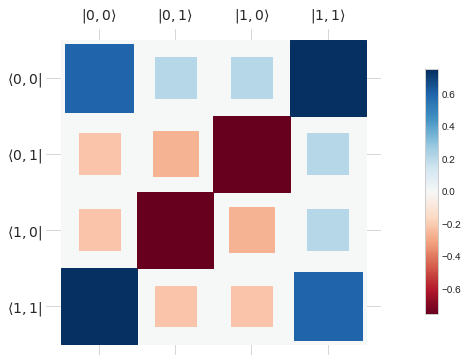

In [300]:
hinton(L_full_maker(xi_opt, dt))

### Try2

In [301]:
total_time = 3*pi/omega_1
epsilon = 10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [302]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([837.23720663+0.j, 991.66577831+0.j, 473.21163489+0.j,
       664.5400768 +0.j, 926.45707821+0.j, 301.95379867+0.j,
       692.49606049+0.j, 757.55775442+0.j, 787.82286238+0.j,
       199.20895569+0.j, 607.14662094+0.j,  13.37026445+0.j,
       334.3484679 +0.j, 570.80514171+0.j, 569.019194  +0.j,
       401.58249453+0.j, 633.44857961+0.j,  14.62520509+0.j,
       878.32044861+0.j, 930.75779055+0.j])

In [303]:
F(xi_opt, dt)

-3.09370672460775

In [304]:
max_iter

10

In [305]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [306]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.46747184+0.j          0.0686161 +0.00054309j  0.0686161 -0.00054309j
   0.53252816+0.j        ]
 [-0.06824192-0.00375552j -0.0212742 +0.00071507j -0.04430893-0.00046809j
   0.06824192+0.00375552j]
 [-0.06824192+0.00375552j -0.04430893+0.00046809j -0.0212742 -0.00071507j
   0.06824192-0.00375552j]
 [ 0.53252816+0.j         -0.0686161 -0.00054309j -0.0686161 +0.00054309j
   0.46747184+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a171a8c18>)

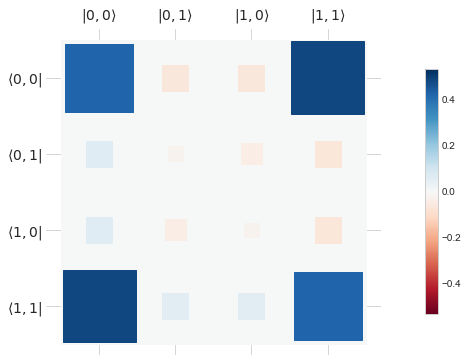

In [307]:
hinton(L_full_maker(xi_opt, dt))

### Try

In [308]:
total_time = 4*pi/omega_1
epsilon = 10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [309]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([179.17782967+0.j, 421.91159552+0.j,  19.61381563+0.j,
       133.53042297+0.j,  54.61885117+0.j, 536.07159273+0.j,
       444.63503324+0.j, 233.36322738+0.j, 786.98649217+0.j,
       892.29917281+0.j, 691.7763256 +0.j, 410.53737169+0.j,
       774.84078755+0.j, 366.06332923+0.j, 642.29217422+0.j,
       875.049807  +0.j, 659.56391445+0.j, 403.99889403+0.j,
       591.43221491+0.j, 487.90108882+0.j])

In [310]:
F(xi_opt, dt)

-3.026736585146171

In [311]:
max_iter

10

In [312]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [313]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.49466562+0.00000000e+00j -0.04009713-3.17281537e-04j
  -0.04009713+3.17281537e-04j  0.50533438+0.00000000e+00j]
 [ 0.04016701-7.49925584e-07j -0.00216658-2.10106765e-04j
  -0.00872822+5.04042445e-04j -0.04016701+7.49925584e-07j]
 [ 0.04016701+7.49925584e-07j -0.00872822-5.04042445e-04j
  -0.00216658+2.10106765e-04j -0.04016701-7.49925584e-07j]
 [ 0.50533438+0.00000000e+00j  0.04009713+3.17281537e-04j
   0.04009713-3.17281537e-04j  0.49466562+0.00000000e+00j]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a174fb240>)

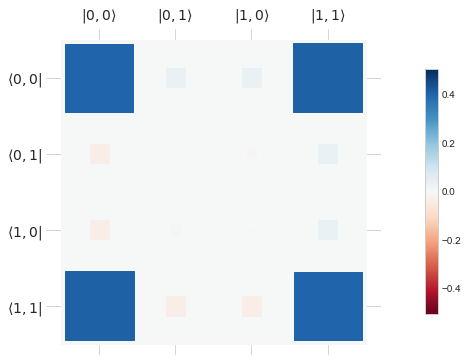

In [314]:
hinton(L_full_maker(xi_opt, dt))

### Try

In [315]:
total_time = 5*pi/omega_1
epsilon = 10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [316]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([520.39574777+0.j, 560.17955127+0.j, 664.11290749+0.j,
       287.20757105+0.j, 486.84641453+0.j, 435.77976891+0.j,
       485.51144461+0.j,  70.64481986+0.j,  21.81349392+0.j,
       911.81126084+0.j, 698.13582919+0.j, 566.46010426+0.j,
       903.96252578+0.j, 723.21676992+0.j, 168.62732297+0.j,
       680.89594374+0.j, 668.53741756+0.j, 593.99125172+0.j,
       169.61207405+0.j, 264.44962292+0.j])

In [317]:
F(xi_opt, dt)

-3.0076677010313495

In [318]:
max_iter

10

In [319]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [320]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.51732071+0.00000000e+00j -0.01295988-7.89541902e-06j
  -0.01295988+7.89541902e-06j  0.48267929+0.00000000e+00j]
 [ 0.01292932+6.15553858e-06j  0.018206  +6.53718692e-05j
   0.01633812+2.60148032e-05j -0.01292932-6.15553858e-06j]
 [ 0.01292932-6.15553858e-06j  0.01633812-2.60148032e-05j
   0.018206  -6.53718692e-05j -0.01292932+6.15553858e-06j]
 [ 0.48267929+0.00000000e+00j  0.01295988+7.89541902e-06j
   0.01295988-7.89541902e-06j  0.51732071+0.00000000e+00j]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1765dbe0>)

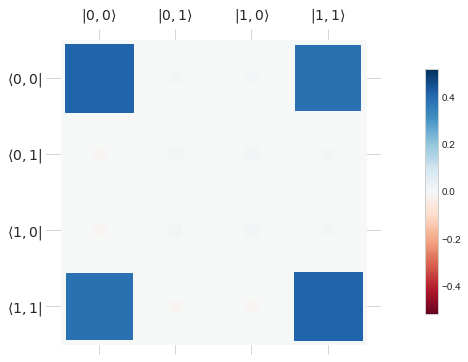

In [321]:
hinton(L_full_maker(xi_opt, dt))

### Try

In [322]:
total_time = 10*pi/omega_1
epsilon = 10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [323]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([478.63021338+0.j, 334.28599982+0.j, 419.86642083+0.j,
       732.99575971+0.j, 799.63719902+0.j, 801.90857991+0.j,
       383.39201738+0.j, 578.39273231+0.j, 882.65421585+0.j,
       830.31595027+0.j, 685.3937831 +0.j, 558.54135723+0.j,
       916.38023558+0.j, 188.49648999+0.j, 357.07917369+0.j,
       649.70972012+0.j, 887.6304414 +0.j, 545.55408319+0.j,
       518.09741622+0.j, 913.22329242+0.j])

In [324]:
F(xi_opt, dt)

-3.000014430624001

In [325]:
max_iter

10

In [326]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [327]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 5.00344981e-01+0.00000000e+00j -8.67622856e-04+3.61244508e-07j
  -8.67622856e-04-3.61244508e-07j  4.99655019e-01+0.00000000e+00j]
 [ 8.67709276e-04-9.52542708e-07j  3.46605010e-04+3.74627637e-07j
   3.43116590e-04-3.89474600e-07j -8.67709276e-04+9.52542708e-07j]
 [ 8.67709276e-04+9.52542708e-07j  3.43116590e-04+3.89474600e-07j
   3.46605010e-04-3.74627637e-07j -8.67709276e-04-9.52542708e-07j]
 [ 4.99655019e-01+0.00000000e+00j  8.67622856e-04-3.61244508e-07j
   8.67622856e-04+3.61244508e-07j  5.00344981e-01+0.00000000e+00j]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a178e2828>)

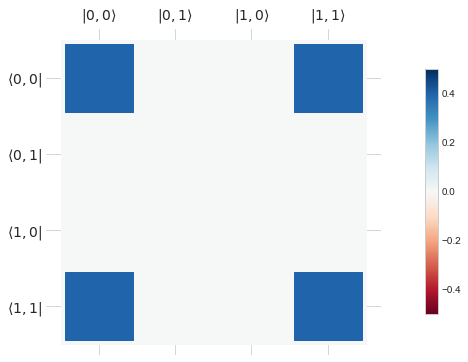

In [328]:
hinton(L_full_maker(xi_opt, dt))

### Try2

In [329]:
total_time = 3*pi/omega_1
epsilon = 10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 200
dt = total_time/time_steps

In [330]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([873.56822888+0.j,  23.81972828+0.j, 964.44775769+0.j,
       965.96001751+0.j, 588.56884912+0.j, 531.37516472+0.j,
       338.25230934+0.j, 566.3587327 +0.j, 785.17866436+0.j,
        17.4419178 +0.j, 570.55689605+0.j,  94.34586349+0.j,
       922.73193716+0.j, 667.27461765+0.j, 101.64886798+0.j,
        11.37126068+0.j,  44.63800374+0.j, 169.57170551+0.j,
       678.85212089+0.j, 573.27129349+0.j, 490.22186751+0.j,
       562.09997474+0.j, 750.18092444+0.j, 807.3846459 +0.j,
       121.95843401+0.j, 703.38625716+0.j, 894.59428115+0.j,
       763.25235542+0.j, 245.45410716+0.j, 572.42144523+0.j,
       135.74420299+0.j, 223.75631591+0.j, 460.7278488 +0.j,
        29.01193926+0.j, 906.9096553 +0.j, 145.43627693+0.j,
       804.66159261+0.j, 179.92683998+0.j, 180.96961755+0.j,
       949.28418348+0.j, 663.66035578+0.j, 411.95922875+0.j,
       541.81766557+0.j, 560.28868646+0.j, 920.02054522+0.j,
       361.31305987+0.j, 625.11529764+0.j, 212.92915516+0.j,
       577.79149922+0.j,

In [331]:
F(xi_opt, dt)

-3.0929975849813016

In [332]:
max_iter

10

In [333]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [334]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.46279109+0.j          0.06583688-0.00620769j  0.06583688+0.00620769j
   0.53720891+0.j        ]
 [-0.06483416-0.00569242j -0.02682322+0.00073093j -0.04885361-0.01076582j
   0.06483416+0.00569242j]
 [-0.06483416+0.00569242j -0.04885361+0.01076582j -0.02682322-0.00073093j
   0.06483416-0.00569242j]
 [ 0.53720891+0.j         -0.06583688+0.00620769j -0.06583688-0.00620769j
   0.46279109+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a178e2eb8>)

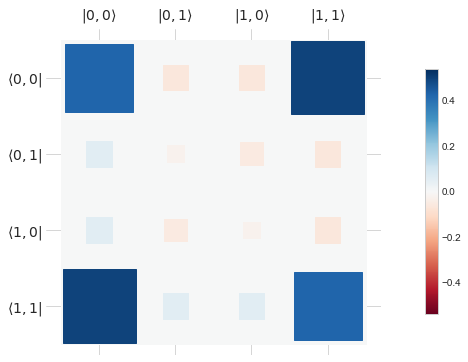

In [335]:
hinton(L_full_maker(xi_opt, dt))

### Try2

In [336]:
total_time = 3*pi/omega_1
epsilon = 10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 50
dt = total_time/time_steps

In [337]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([565.36261919+0.j, 862.20523447+0.j, 514.53280043+0.j,
       332.56600825+0.j, 218.60122506+0.j, 442.60688153+0.j,
       922.41608006+0.j, 554.76283686+0.j, 594.18276741+0.j,
       824.65344179+0.j, 436.20034017+0.j, 251.9477373 +0.j,
       271.63075404+0.j, 681.9183606 +0.j, 748.06110478+0.j,
       420.7548148 +0.j, 156.05168652+0.j, 965.85732388+0.j,
       920.767179  +0.j, 429.4616263 +0.j, 787.51389135+0.j,
       162.08700569+0.j, 335.03074586+0.j, 549.26009835+0.j,
       411.8504811 +0.j, 835.4553536 +0.j, 721.48971023+0.j,
        18.04966153+0.j, 183.07590183+0.j, 920.19090694+0.j,
       293.59552071+0.j, 185.74297667+0.j, 553.73664421+0.j,
       356.54946369+0.j, 761.29852533+0.j, 306.67400773+0.j,
       766.97542993+0.j, 424.37758005+0.j, 376.81298213+0.j,
       250.17236606+0.j, 149.27278194+0.j, 307.59283811+0.j,
       636.03910371+0.j, 322.6959526 +0.j, 105.37867249+0.j,
       949.52333174+0.j, 717.12152467+0.j, 500.40070616+0.j,
       515.00938198+0.j,

In [338]:
F(xi_opt, dt)

-3.0930575910402434

In [339]:
max_iter

10

In [340]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [341]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.42540253+0.j          0.01395317-0.00068462j  0.01395317+0.00068462j
   0.57459747+0.j        ]
 [-0.01354561+0.00098191j -0.06316624+0.00035702j -0.08620586+0.00129441j
   0.01354561-0.00098191j]
 [-0.01354561-0.00098191j -0.08620586-0.00129441j -0.06316624-0.00035702j
   0.01354561+0.00098191j]
 [ 0.57459747+0.j         -0.01395317+0.00068462j -0.01395317-0.00068462j
   0.42540253+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a17ad7e80>)

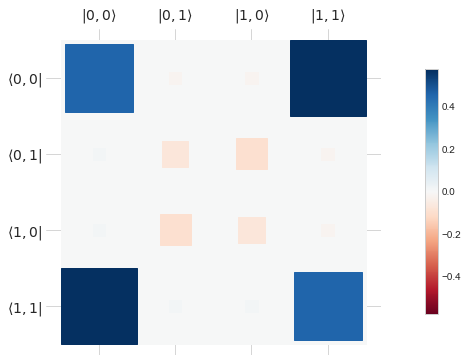

In [342]:
hinton(L_full_maker(xi_opt, dt))

### Try2

In [343]:
total_time = 3*pi/omega_1
epsilon = 10**(-6)
max_iter = 20#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [344]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([311.84738201+0.j, 157.09189159+0.j, 211.09348421+0.j,
       783.51296891+0.j, 174.08552266+0.j, 997.98577978+0.j,
       296.58178453+0.j, 983.05312408+0.j, 676.81082369+0.j,
       140.36386691+0.j, 446.23226996+0.j, 806.26693788+0.j,
       677.57982072+0.j, 500.23141187+0.j, 348.80196738+0.j,
       923.85268193+0.j, 713.15664443+0.j, 904.51335698+0.j,
       602.91824368+0.j, 527.55027954+0.j])

In [345]:
F(xi_opt, dt)

-3.0927061125972632

In [346]:
max_iter

20

In [347]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [348]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.57040164+0.00000000e+00j -0.02842067+5.27199726e-06j
  -0.02842067-5.27199726e-06j  0.42959836+0.00000000e+00j]
 [ 0.02837113-1.19731674e-05j  0.08193917+1.68857837e-04j
   0.0588849 -7.51969543e-06j -0.02837113+1.19731674e-05j]
 [ 0.02837113+1.19731674e-05j  0.0588849 +7.51969543e-06j
   0.08193917-1.68857837e-04j -0.02837113-1.19731674e-05j]
 [ 0.42959836+0.00000000e+00j  0.02842067-5.27199726e-06j
   0.02842067+5.27199726e-06j  0.57040164+0.00000000e+00j]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a177c9908>)

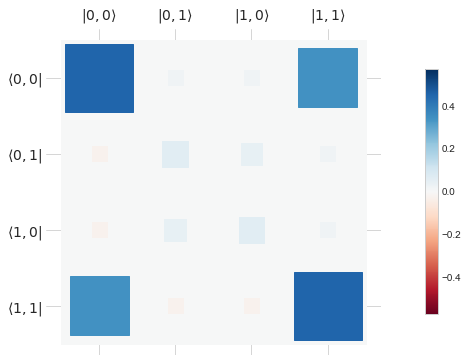

In [349]:
hinton(L_full_maker(xi_opt, dt))

### Try2

In [350]:
total_time = 3*pi/omega_1
epsilon = 10**(-6)
max_iter = 100#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [351]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([182.43653248+0.j, 867.06732414+0.j,  65.50167002+0.j,
       144.85557687+0.j,  16.88620018+0.j, 761.81453373+0.j,
       121.90809977+0.j, 197.84516053+0.j, 673.6792592 +0.j,
       242.8112217 +0.j,  91.63889292+0.j, 903.04222038+0.j,
       855.93152305+0.j, 746.78917213+0.j, 200.61435644+0.j,
       619.13795433+0.j, 723.41694576+0.j, 180.36314677+0.j,
       959.70418418+0.j, 570.19508083+0.j])

In [352]:
F(xi_opt, dt)

-3.0926291457239135

In [353]:
max_iter

100

In [354]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [355]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.47509946+0.j          0.07162383+0.00069519j  0.07162383-0.00069519j
   0.52490054+0.j        ]
 [-0.0717844 -0.00039981j -0.01333724-0.0003975j  -0.03640236+0.00067576j
   0.0717844 +0.00039981j]
 [-0.0717844 +0.00039981j -0.03640236-0.00067576j -0.01333724+0.0003975j
   0.0717844 -0.00039981j]
 [ 0.52490054+0.j         -0.07162383-0.00069519j -0.07162383+0.00069519j
   0.47509946+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a17e52908>)

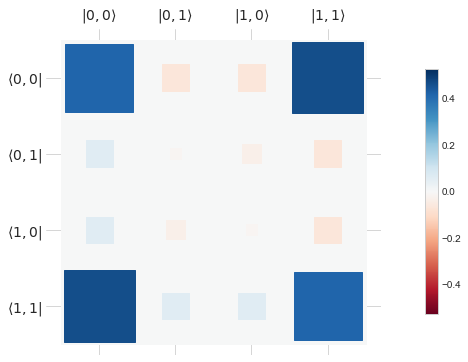

In [356]:
hinton(L_full_maker(xi_opt, dt))

### Try2

In [357]:
total_time = 3*pi/omega_1
epsilon = 10**(-6)
max_iter = 100#10**4#1000#100#50#20
time_steps = 200
dt = total_time/time_steps

In [358]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([309.87811954+0.j, 236.43585713+0.j, 118.41525827+0.j,
       854.84797349+0.j, 330.60929709+0.j, 618.77657647+0.j,
        54.49320676+0.j, 218.16386985+0.j, 532.42116403+0.j,
        55.03114959+0.j, 464.3507831 +0.j, 799.85326798+0.j,
       123.97991051+0.j, 863.38530215+0.j, 448.61872715+0.j,
       632.39727211+0.j, 160.18196056+0.j, 740.93515028+0.j,
       631.97602749+0.j, 365.39260668+0.j, 298.21326149+0.j,
       248.06444473+0.j, 282.7159466 +0.j, 372.02513359+0.j,
       633.7458858 +0.j, 340.35243402+0.j, 507.60409195+0.j,
       688.02197416+0.j, 815.68739166+0.j, 765.03767604+0.j,
       520.34957348+0.j, 199.63577213+0.j, 677.64753931+0.j,
       775.13763517+0.j,  46.42133529+0.j, 308.85660151+0.j,
       766.35548809+0.j, 931.0644379 +0.j, 646.6522833 +0.j,
       471.94251158+0.j, 550.51796045+0.j, 633.94851628+0.j,
       772.25231832+0.j, 361.18370365+0.j, 982.56697789+0.j,
       274.92160285+0.j, 937.3518567 +0.j, 911.84205291+0.j,
       290.33722977+0.j,

In [359]:
F(xi_opt, dt)

-3.089065520081527

In [360]:
max_iter

100

In [361]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [362]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.42438911+0.j          0.00436814-0.00285819j  0.00436814+0.00285819j
   0.57561089+0.j        ]
 [-0.00526814+0.00843195j -0.06351874-0.00356155j -0.0862861 -0.00187412j
   0.00526814-0.00843195j]
 [-0.00526814-0.00843195j -0.0862861 +0.00187412j -0.06351874+0.00356155j
   0.00526814+0.00843195j]
 [ 0.57561089+0.j         -0.00436814+0.00285819j -0.00436814-0.00285819j
   0.42438911+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a17f22668>)

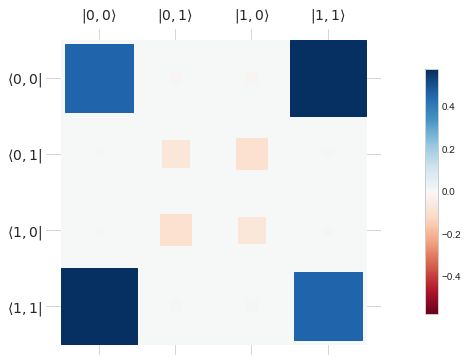

In [363]:
hinton(L_full_maker(xi_opt, dt))

### Try2

In [364]:
total_time = 3*pi/omega_1
epsilon = (0.1*2*pi)/(total_time)#10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [365]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([717.42014731+0.j, 284.35389182+0.j, 280.18369592+0.j,
       361.2304256 +0.j, 705.15929386+0.j, 485.98398502+0.j,
       182.84260372+0.j, 887.23684992+0.j, 589.34493141+0.j,
       216.6905176 +0.j, 115.13240711+0.j,  28.45977476+0.j,
       423.03186408+0.j, 937.93523471+0.j, 195.11950776+0.j,
       976.02130119+0.j, 293.07175144+0.j, 476.12566525+0.j,
        61.35112312+0.j, 714.61951195+0.j])

In [366]:
F(xi_opt, dt)

-3.0927297180073468

In [367]:
max_iter

10

In [368]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [369]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.43911673+0.00000000e+00j -0.04533053+9.60495662e-07j
  -0.04533053-9.60495662e-07j  0.56088327+0.00000000e+00j]
 [ 0.0452652 -1.28687052e-03j -0.04937634+4.89373695e-04j
  -0.0724106 +2.05198405e-03j -0.0452652 +1.28687052e-03j]
 [ 0.0452652 +1.28687052e-03j -0.0724106 -2.05198405e-03j
  -0.04937634-4.89373695e-04j -0.0452652 -1.28687052e-03j]
 [ 0.56088327+0.00000000e+00j  0.04533053-9.60495662e-07j
   0.04533053+9.60495662e-07j  0.43911673+0.00000000e+00j]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a17f475c0>)

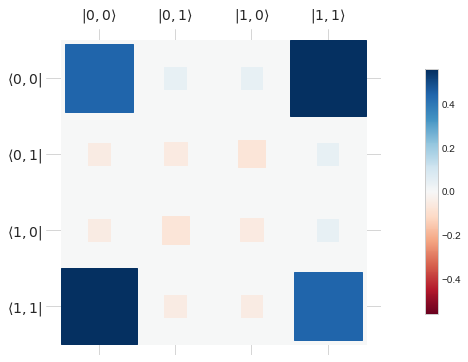

In [370]:
hinton(L_full_maker(xi_opt, dt))

### Try2

In [371]:
total_time = 3*pi/omega_1
epsilon = (0.1*2*pi)/(total_time)#10**(-6)
max_iter = 500#10#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [372]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([765.62481621+0.j, 149.72832438+0.j, 587.5465497 +0.j,
       297.70905253+0.j, 763.16426829+0.j, 398.01566036+0.j,
       978.78652629+0.j, 607.03527672+0.j, 802.22484735+0.j,
       273.2265245 +0.j, 601.75121654+0.j, 266.75942774+0.j,
       793.93269226+0.j, 461.82607764+0.j, 200.61981875+0.j,
       941.82798742+0.j, 630.89796579+0.j, 187.04940957+0.j,
       527.90288562+0.j, 639.29952462+0.j])

In [373]:
F(xi_opt, dt)

-3.0928477357727067

In [374]:
max_iter

500

In [375]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [376]:
myU = L_full_maker(xi_opt, dt)

In [377]:
myU/myU[0, 3]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.73811789+0.j         -0.01615673-0.00045178j -0.01615673+0.00045178j
   1.        +0.j        ]
 [ 0.01609412+0.00051702j -0.11095176-0.00010366j -0.15102007+0.00019988j
  -0.01609412-0.00051702j]
 [ 0.01609412-0.00051702j -0.15102007-0.00019988j -0.11095176+0.00010366j
  -0.01609412+0.00051702j]
 [ 1.        +0.j          0.01615673+0.00045178j  0.01615673-0.00045178j
   0.73811789+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a181000f0>)

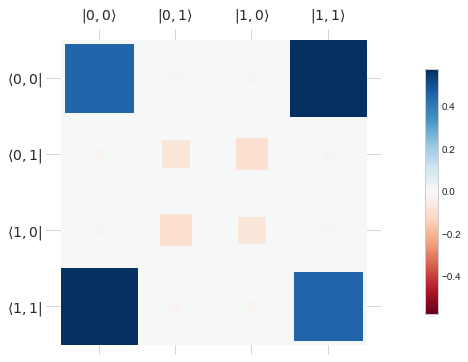

In [378]:
hinton(myU)

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a18242898>)

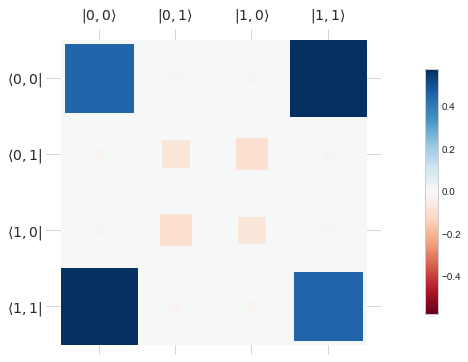

In [379]:
hinton(L_full_maker(xi_opt, dt))

### Try

In [380]:
total_time = 3*pi/omega_1
epsilon = (0.1*2*pi)/(total_time)#10**(-6)
max_iter = 500#10#10**4#1000#100#50#20
time_steps = 500
dt = total_time/time_steps

In [381]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
#xi_opt

In [382]:
F(xi_opt, dt)

-3.0978484663246517

In [383]:
max_iter

500

In [384]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [385]:
myU = L_full_maker(xi_opt, dt)

In [386]:
myU/myU[0, 3]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 1.32986914+0.j          0.06672172+0.00012361j  0.06672172-0.00012361j
   1.        +0.j        ]
 [-0.06622115+0.00859194j  0.18898441+0.00504413j  0.1350247 +0.00140284j
   0.06622115-0.00859194j]
 [-0.06622115-0.00859194j  0.1350247 -0.00140284j  0.18898441-0.00504413j
   0.06622115+0.00859194j]
 [ 1.        +0.j         -0.06672172-0.00012361j -0.06672172+0.00012361j
   1.32986914+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a180b0978>)

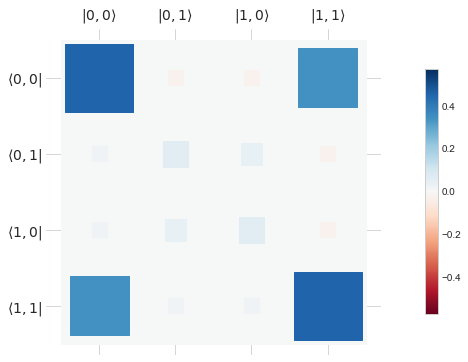

In [387]:
hinton(myU)

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a185e4c18>)

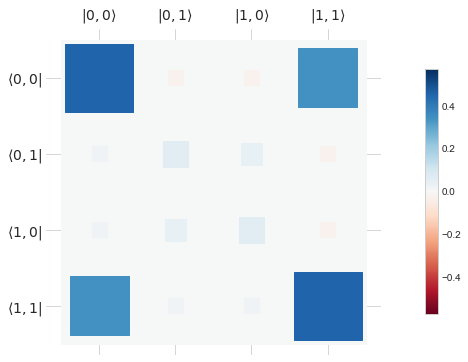

In [388]:
hinton(L_full_maker(xi_opt, dt))

### Try

In [389]:
total_time = 10*pi/omega_1
epsilon = (0.1*2*pi)/(total_time)#10**(-6)
max_iter = 500#10#10**4#1000#100#50#20
time_steps = 500
dt = total_time/time_steps

In [390]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
#xi_opt

In [391]:
F(xi_opt, dt)

-2.99996471529451

In [392]:
max_iter

500

In [393]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [394]:
myU = L_full_maker(xi_opt, dt)

In [395]:
myU/myU[0, 3]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 9.98825883e-01+0.00000000e+00j -1.62180278e-03-2.90996304e-04j
  -1.62180278e-03+2.90996304e-04j  1.00000000e+00+0.00000000e+00j]
 [ 1.80600931e-03+7.22232562e-05j -5.34103221e-04-1.04071454e-04j
  -5.66105583e-04-8.57109731e-05j -1.80600931e-03-7.22232562e-05j]
 [ 1.80600931e-03-7.22232562e-05j -5.66105583e-04+8.57109731e-05j
  -5.34103221e-04+1.04071454e-04j -1.80600931e-03+7.22232562e-05j]
 [ 1.00000000e+00+0.00000000e+00j  1.62180278e-03+2.90996304e-04j
   1.62180278e-03-2.90996304e-04j  9.98825883e-01+0.00000000e+00j]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a186fda58>)

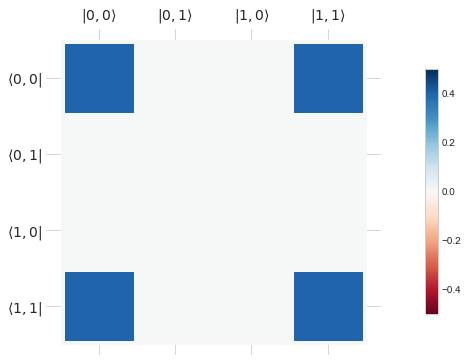

In [396]:
hinton(myU)

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a187aaac8>)

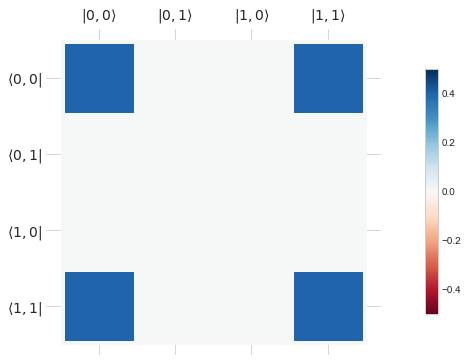

In [397]:
hinton(L_full_maker(xi_opt, dt))